Number of qubits: 4
Total states (N): 16
Marked states (M): 4
Fraction of marked states (M/N): 4/16 = 0.25
Optimal number of iterations: 1
global phase: π
        ┌───┐┌───┐ 1-Z ┌───┐      1-Z ┌───┐ 1-Z ┌───┐ 1-Z ┌───┐┌───┐          »
   q_0: ┤ H ├┤ X ├──■──┤ X ├───────■──┤ X ├──■──┤ X ├──■──┤ H ├┤ X ├───────■──»
        ├───┤├───┤  │  ├───┤┌───┐  │  ├───┤  │  └───┘  │  ├───┤├───┤       │  »
   q_1: ┤ H ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├──■─────────■──┤ H ├┤ X ├───────■──»
        ├───┤├───┤  │  ├───┤└───┘  │  ├───┤  │  ┌───┐  │  ├───┤├───┤       │  »
   q_2: ┤ H ├┤ X ├──■──┤ X ├───────■──┤ X ├──■──┤ X ├──■──┤ H ├┤ X ├───────■──»
        ├───┤├───┤  │  ├───┤┌───┐  │  ├───┤  │  └───┘  │  ├───┤├───┤┌───┐┌─┴─┐»
   q_3: ┤ H ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├──■─────────■──┤ H ├┤ X ├┤ H ├┤ X ├»
        └───┘└───┘     └───┘└───┘     └───┘               └───┘└───┘└───┘└───┘»
meas: 4/══════════════════════════════════════════════════════════════════════»
                                             

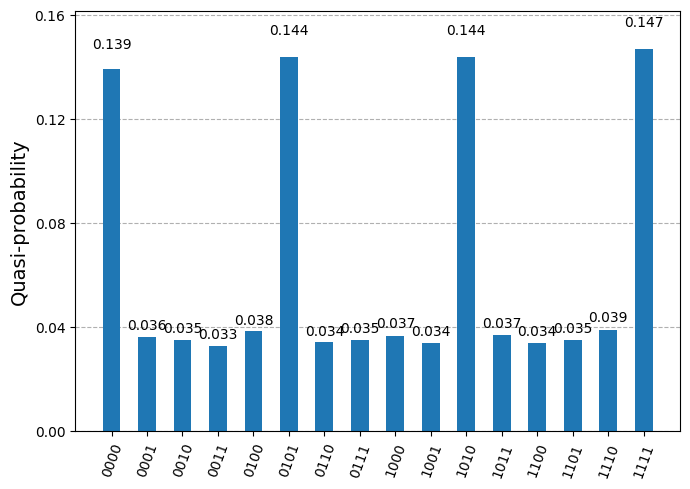

In [1]:
from Helper_Functions import Grover_oracle, Grover_operator, Get_Data_from_Fake_backend
import numpy as np
import math

from qiskit import QuantumCircuit
from qiskit_ibm_runtime.fake_provider import FakeAlgiers
from qiskit.visualization import plot_distribution

# 1. Define four marked states in a 4-qubit system
marked_states = ["0000", "0101", "1010", "1111"]

# 2. Construct Oracle/Operator
oracle = Grover_oracle(marked_states)
operator = Grover_operator(oracle)

# 3. Calculate optimal iterations
n = 4                          # number of qubits
M = len(marked_states)         # 4 marked states
N = 2 ** n                     # 16 total states

optimal_iterations = math.floor(math.pi / (4 * math.asin(math.sqrt(M / N))))

print(f"Number of qubits: {n}")
print(f"Total states (N): {N}")
print(f"Marked states (M): {M}")
print(f"Fraction of marked states (M/N): {M}/{N} = {M/N}")
print(f"Optimal number of iterations: {optimal_iterations}")

# 4. Run Circuit
qc = QuantumCircuit(n)
qc.h(range(n))                # put all qubits in superposition

for _ in range(optimal_iterations):
    qc.compose(operator, inplace=True)

qc.measure_all()
print(qc.draw())

# 5. Run on backend using the fake provider and 10000 shots
backend = FakeAlgiers()
data_pub = Get_Data_from_Fake_backend(10000, qc, backend)
counts = data_pub.meas.get_counts()
print(counts)

# 6. Plot the results
plot_distribution(counts)